## Import Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pickle
import os

## Read Data

In [65]:
data = pd.read_csv('Data/emails.csv')
data.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Data Insights

In [66]:
print(f"Shape of Data: {data.shape}")

Shape of Data: (5728, 2)


In [67]:
print(f"No of Spams: {data['spam'].sum()}")
print(f"No of Not Spams: {(data['spam'] == 0).sum()}")

No of Spams: 1368
No of Not Spams: 4360


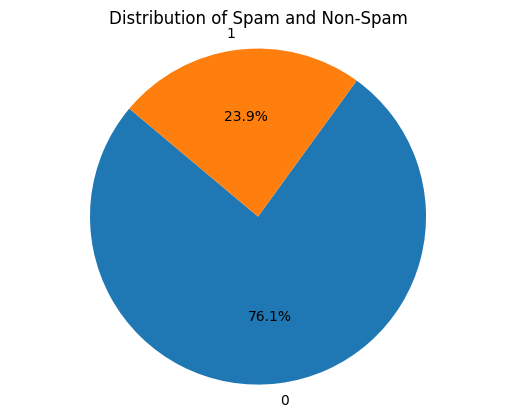

In [68]:
spam_counts = data['spam'].value_counts()

plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Spam and Non-Spam')
plt.show()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [70]:
## No Null Values

In [71]:
print(f"No of Duplicates : {data.duplicated().sum()}")

No of Duplicates : 33


In [72]:
## Total 33 duplicates,,,Need to drop them

In [73]:
data.drop_duplicates(inplace=True)
print(f"No of Duplicates After Deletion : {data.duplicated().sum()}")

No of Duplicates After Deletion : 0


## Data Division

In [74]:
X = data['text']
y = data['spam']

## Train Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

## Preprocessing

In [76]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


# The CountVectorizer from scikit-learn is a tool used for converting a collection of text documents into a matrix 
# of token counts. In simpler terms, it is a method for vectorizing textual data, commonly used in natural language 
# processing (NLP) tasks.

# How CountVectorizer works:
# * Tokenization: First, it breaks down each document (text) into individual words or tokens. This process involves 
#                 removing punctuation, splitting text into words based on whitespace, and potentially applying other 
#                 text preprocessing steps.
# * Counting: Next, it counts the occurrences of each token in each document. It creates a matrix where each row 
#             represents a document, and each column represents a unique token (word) in the entire corpus. The value 
#             at each cell indicates the frequency of the corresponding token in the respective document.
# * Vectorization: Finally, it represents each document as a vector in a high-dimensional space, where each dimension 
#                  corresponds to a unique token. This allows text data to be processed by machine learning algorithms,
#                  which typically require numerical input.

In [77]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
len(X_train.toarray()[0])

33866

## Model Training

In [79]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [80]:
y_predict = model.predict(X_test)

## Model Evaluation

In [81]:
print(f"Testing Accuracy : {accuracy_score(y_predict, y_test) * 100} %")

Testing Accuracy : 99.12203687445127 %


In [82]:
print(f"Training Accuracy: {model.score(X_train, y_train) * 100} %")

Training Accuracy: 99.64881474978051 %


## Test Using Custom Mail

### Test 1

In [83]:
email = ['Hi Susovan, Please give me thesis updates on every Monday.']

In [84]:
email = cv.transform(email)

In [85]:
pred = model.predict(email)
prediction_label = "Not Spam" if pred == 0 else "Spam"
print(f"Prediction for this email: {prediction_label}")

Prediction for this email: Not Spam


### Test 2

In [86]:
email = ['Hi Susovan. You have won 1 million dollars lottery. Click on the below link to get your money.']

In [87]:
email = cv.transform(email)

In [88]:
pred = model.predict(email)
prediction_label = "Not Spam" if pred == 0 else "Spam"
print(f"Prediction for this email: {prediction_label}")

Prediction for this email: Spam


In [89]:
## We can see it is predicting correctly.

In [90]:
## But we can't use the model directly as before sending the 'email' to the model we need to preprocess it,,
## So need to use Pipeline which will help us to preprocess it on its own

## Pipeline

### Making Pipeline

In [91]:
# I need to merge the preprocess and the model
# preprocess object - cv
# model - model

In [92]:
pipe = make_pipeline(cv, model)

### Pipeline Training

In [93]:
df = pd.read_csv('Data/emails.csv')
df.drop_duplicates(inplace=True)
X = df['text']
y = df['spam']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [95]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [96]:
y_pred = pipe.predict(X_test)

In [97]:
print(f"Testing Accuracy : {accuracy_score(y_pred, y_test) * 100} %")

Testing Accuracy : 99.12203687445127 %


### Pickle File

In [98]:
os.makedirs('Model',exist_ok=True)
pickle.dump(pipe, open("Model/Naive_model.pkl",'wb'))